In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
import matplotlib.pyplot as plt
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")

In [35]:
data = pd.read_csv("Walmart_Store_sales.csv")

In [36]:
data.head()

,Store,Month,Day,Year,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,28,1,10,2010,1/10/2010,1203080.41,0,85.20,3.001,126.234600,14.313
1,29,1,10,2010,1/10/2010,474698.01,0,69.31,2.717,132.756800,10.524
2,30,1,10,2010,1/10/2010,445475.30,0,70.28,2.603,211.329874,8.163
3,31,1,10,2010,1/10/2010,1213981.64,0,70.28,2.603,211.329874,8.163
4,32,1,10,2010,1/10/2010,1061089.56,0,66.14,2.759,190.673824,9.137


In [37]:
x = data.drop(['Weekly_Sales', 'Date'], axis = 1) # Features
y = data['Weekly_Sales'] # Target

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)
model = RandomForestRegressor(n_estimators = 1000, random_state = 28)
model.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=1000, random_state=28)

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

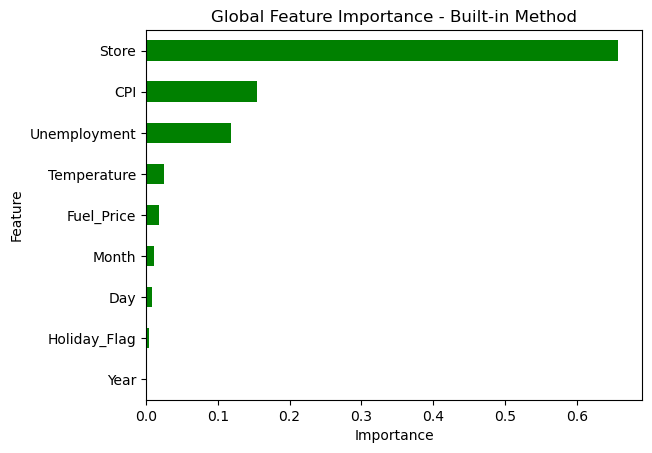

In [73]:
global_importances = pd.Series(model.feature_importances_, index=x_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [39]:
filename = 'model.pkl'
pkl.dump(model, open(filename, 'wb'))

In [40]:
y_pred = model.predict(x_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  150619.75


In [41]:
test_data = pd.read_csv("test_data.csv")
test_data

,Store,Month,Day,Year,Holiday _Flag,Temprature,Fuel_Price,CPI,Unemployment
0,28,10,15,2023,0,81,3.371,307.789,3.8
1,28,10,22,2023,0,86,3.257,307.789,3.9
2,28,10,29,2023,1,87,3.331,307.789,3.9
3,28,11,5,2023,1,82,3.194,307.671,3.9
4,28,11,12,2023,0,78,3.217,307.671,3.9
5,28,11,19,2023,1,79,3.320,307.671,3.9


In [70]:
vals = []
dates = []

for i in range(len(test_data)):
    st = str(test_data['Month'].loc[i]) + "/" + str(test_data['Day'].loc[i]) + "/" + str(test_data['Year'].loc[i])
    dates.append(st)
print(dates)

['10/15/2023', '10/22/2023', '10/29/2023', '11/5/2023', '11/12/2023', '11/19/2023']


In [71]:
feature_columns = ['Store', 'Month', 'Day', 'Year', 'Holiday _Flag', 'Temprature', 'Fuel_Price', 'CPI', 'Unemployment']

for index, row in test_data.iterrows():
    # Extract features from the current row, replace this with your actual feature extraction logic
    # For example, assuming 'feature_columns' is a list of column names used as features
    features = row[feature_columns].values.reshape(1, -1)

    # Make a prediction using the model
    vals.append(model.predict(features))

print(vals)

[array([732354.92004]), array([749223.64169]), array([755069.05428]), array([744904.14244]), array([736195.89432]), array([740634.22229])]


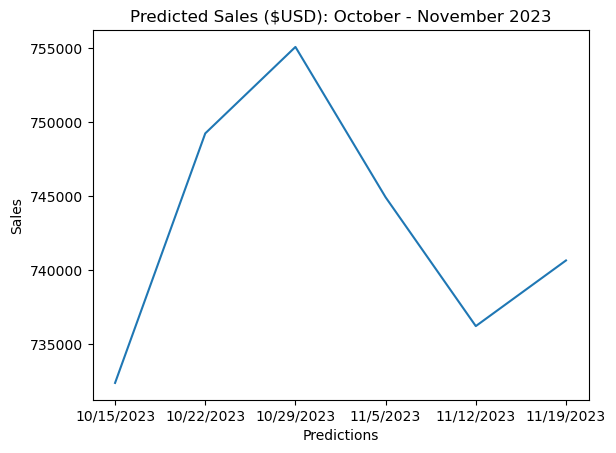

In [72]:
plt.plot(dates, vals)
plt.title("Predicted Sales ($USD): October - November 2023")
plt.xlabel("Predictions")
plt.ylabel("Sales")
plt.show()